In [13]:
import pandas as pd
import geopandas as gpd
import requests
import numpy as np
import streamlit as st
import zipfile
import io
import fiona

In [2]:
fp_agcomm = r"C:\Users\nariv\OneDrive\JupyterN\streamlit_local\pesticides\data_sources\AgComm_Stanislaus"

fbs = gpd.read_file(fp_agcomm + r"\field_boundaries\Crops_02_12_2024.shp")
fbs.drop_duplicates(inplace = True, ignore_index=True)

In [3]:
# Unify column names
permittee = 'permittee'
site_id = 'site_id'
permit_num =  'permit_num'
permit_yr = 'permit_yr'
loc_narr =  'loc_narr'
is_active = 'is_active'
size =  'size'
 # 'size_units',
 # 'Shape_Leng',
 # 'Shape_Area',
 # 'geometry',
 # 'area'

In [4]:
pur = pd.read_excel(fp_agcomm + r"\allpurs2023.xlsb")
pur.drop_duplicates(inplace = True, ignore_index = True)

['Permit #': permit_num,
 'Permitee': permittee,
 'Site ID': site_id,
 'Site District',
 'Block ID',
 'Source',
 'Site Location',
 'Site Name',
 'Meridian',
 'Township',
 'Range',
 'Section',
 'Application Date',
 'Application Time',
 'Commodity Code',
 'Commodity',
 'Pre-plant',
 'Planted Amount',
 'Planted Units',
 'EPA Reg No',
 'Product Name',
 'Registration Expired',
 'RMP',
 'Quantity Used',
 'Quantity Units',
 'Treated Amount',
 'Treated Units',
 'Appl. Method',
 'Fume Code',
 'Applicator Name',
 'Applicator License #',
 'Applicator License Type',
 'Applicator Address',
 'Days Reentry',
 'Days Pre-Harvest',
 'Document#',
 'Submitted By',
 'Submitted Date',
 'Entered By',
 'Time Stamp Date',
 'Time Stamp Time',
 'Rpt Status',
 'Sub Status',
 'School Notify']

In [5]:
pur_newcolnames = {'Permit #': permit_num,
 'Permitee': permittee,
 'Site ID': site_id}

In [6]:
sites = pd.read_excel(fp_agcomm + r"\AllSites2023.xlsb")
sites.drop_duplicates(inplace = True, ignore_index = True)


# Unify col names to shorter codes from fieldbounds columns
['Permit Type',
 'Permit Number': 'permit_num',
 'Permit Year': 'permit_yr',
 'Version',
 'Revision Type',
 'Version Date',
 'Signed',
 'Operator',
 'Permit Status',
 'Agent Name',
 'Mailing Address',
 'City',
 'State',
 'Zip',
 'Issue Date',
 'Effective Date',
 'Expiration Date',
 'Issuing Officer',
 'Status',
 'Ag/Non-Ag',
 'Permit District',
 'Duration',
 'Possession',
 'NOI Hours',
 'Employees',
 'Field Worker',
 'Permit Active',
 'Site-ID': site_id,
 'Location Narrative': loc_narr,
 'Site Name',
 'Size': size,
 'Units',
 'GIS Acres',
 'M':'Meridian',  # fROM pur
 'T':'Township',
 'R': 'Range',
 'S':  'Section',
 'Cropping Pattern',
 'Site Active': is_active,
 'Commodity',
 'Comm Code': 'Commodity Code',
 'Qualifier',
 'Planted Size',
 'Planted Units',
 'From Date',
 'To Date',
 'Block',
 'Commodity Active']

In [7]:
 sites_newcolnames = {'Permit Number': 'permit_num',
 'Permit Year': 'permit_yr',
 'Site-ID': site_id,
 'Location Narrative': loc_narr,
 'Size': size,
 'M':'Meridian',  # fROM pur
 'T':'Township',
 'R': 'Range',
 'S':  'Section',
 'Site Active': is_active,
 'Comm Code': 'Commodity Code'}


In [ ]:
trm = r"https://gis.conservation.ca.gov/server/rest/services/Base/BASE_PLSS/MapServer/0/query?outFields=*&where=1%3D1&f=geojson"
# Township and range and Meridion and "Source" as shapefiles...



In [11]:
def list_cols(df, as_vert = True):
    if as_vert:
        dfc = df.columns.to_list()
    else:
        dfc = sorted(df.columns.to_list())
    return dfc

def update_colnames(df, dfnewcolsdict):
    for key in list(dfnewcolsdict.keys()):
        df[dfnewcolsdict[key]] = df[key].copy()
        df.drop(key, axis = 1, inplace = True)

def unify_pn(df):
    if isinstance(df['permit_num'].iloc[0], str):
        df['permit_num'] = [int(cpm) for cpm in df['permit_num'] ]
    else:
        df['permit_num'] = [int(cpm) if not np.isnan(cpm) else cpm for cpm in df['permit_num'] ]

def unify_py(df):
    df['permit_yr'] = [int(py) for py in df['permit_yr']]
    
update_colnames(pur, pur_newcolnames)
update_colnames(sites, sites_newcolnames)

unify_pn(pur)
unify_pn(sites)
unify_pn(fbs)

# unify_py(pur)
unify_py(sites)
unify_py(fbs)

# Unify datatype of Commodity Code in pur with sites. 
pur["Commodity Code0"] = [int(cs.split("-")[0]) for cs in pur["Commodity Code"]]
pur["Commodity Code1"] = [int(cs.split("-")[1]) for cs in pur["Commodity Code"]]
pur["Commodity Code"] = pur["Commodity Code0"].copy()


In [14]:
# df.columns.to_list()

In [18]:
for col in df.columns.to_list():
    print(col)
    print("\t", df[col].iloc[0])
    if len(df[col].unique())<100:
        print("\t", df[col].unique())
    else: 
        print("\t", len(df[col].unique()), " unique values")

Site District
	 03
	 ['03' '01' '02' nan '04' 'PILOT' '00']
Block ID
	 nan
	 [nan 'C1' 'M1']
Source
	 webxml
	 ['webxml' 'webpublic' 'webbatch' 'webcounty' 'desktop']
Site Location
	 NE COR BLAKER & BRADBURY
	 6013  unique values
Site Name
	 OUTSIDE GWPA
	 1163  unique values
Meridian
	 M
	 ['M' nan]
Township
	 05S
	 ['05S' '03S' '06S' '04S' '02S' '01N' '01S' '07S' '08S' '09S' '03N' '02N'
 nan]
Range
	 09E
	 ['09E' '08E' '10E' '12E' '11E' '07E' '06E' '13E' '05E' nan '14E']
Section
	 34.0
	 [34. 33.  6. 36. 11. 15.  8. 21. 16. 18. 35. 19.  2.  1. 20.  9. 32. 25.
 26. 27.  5. 28. 24. 14.  7. 17. 13. 22.  3. 29. 30. 23. 31.  4. 12. 10.
 nan]
Application Date
	 44929
	 363  unique values
Application Time
	 3:56 PM
	 696  unique values
Commodity Code
	 22007
	 [22007  3001 22006  5004 23001  5000  3009 24011   155  4001 22000    40
 29143 29125  5002  5001 29109 13501 13014 13025  8015 29123 29137 13021
 13012  5003  5005 13031 14004 29136   154 14010  3011 13502 13011 13010
 13009 28014 13

In [81]:
def add_geometry2(df, gdf, on = ['site_id', 'permit_num']):
    # Create a composite key for merging
    df['key'] = df[on].apply(tuple, axis=1)
    gdf['key'] = gdf[on].apply(tuple, axis=1)
    
    # Merge the DataFrames on the composite key
    merged_df = pd.merge(df, gdf, on='key', how='left')
    
    # Drop the key column as it's no longer needed
    # merged_df.drop(columns=['key'], inplace=True)
    
    # Convert the merged DataFrame into a GeoDataFrame
    if 'geometry' in merged_df.columns:
        merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry', crs=gdf.crs)
         # Identify the rows that did not find a match in the GeoDataFrame
        c1 = merged_gdf['geometry'].isna()
        c2 = merged_gdf['geometry'] == None
        c3 = merged_gdf['geometry'] == "None"
        # reject_df = merged_gdf[(c1)|(c2)| (c3)].drop(columns='geometry').copy()
        # merged_gdfsm = merged_gdf[(~c1)|(merged_gdf['geometry'] != None)|(merged_gdf['geometry'] != "None")].copy()
        reject_df = merged_gdf[c2].drop(columns='geometry').copy()
        merged_gdfsm = merged_gdf[merged_gdf['geometry'] != None].copy()
        print(len(merged_gdfsm))
    else:
        merged_gdfsm = pd.DataFrame(merged_df)
        reject_df = []

    return merged_gdfsm, reject_df

In [82]:
mgdf2, rdf2 =  add_geometry2(df, fbs)

111845


In [106]:
mgdf2.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [87]:
mgdf2.to_file(r"C:\Users\nariv\OneDrive\JupyterN\streamlit_local\pesticides\data_sources\AgComm_Stanislaus\merged_pur_sites_fieldbds.geojson", driver = "GeoJSON")

In [89]:
rdf2.to_excel(r"C:\Users\nariv\OneDrive\JupyterN\streamlit_local\pesticides\data_sources\AgComm_Stanislaus\merged_pur_sites_w_NO_fieldbds.xlsx")


In [86]:
import pyogrio

pyogrio.list_drivers()  

{'FITS': 'rw',
 'PCIDSK': 'rw',
 'netCDF': 'rw',
 'PDS4': 'rw',
 'VICAR': 'rw',
 'JP2OpenJPEG': 'r',
 'PDF': 'rw',
 'MBTiles': 'rw',
 'TileDB': 'rw',
 'BAG': 'rw',
 'EEDA': 'r',
 'OGCAPI': 'r',
 'ESRI Shapefile': 'rw',
 'MapInfo File': 'rw',
 'UK .NTF': 'r',
 'LVBAG': 'r',
 'OGR_SDTS': 'r',
 'S57': 'rw',
 'DGN': 'rw',
 'OGR_VRT': 'r',
 'Memory': 'rw',
 'CSV': 'rw',
 'NAS': 'r',
 'GML': 'rw',
 'GPX': 'rw',
 'LIBKML': 'rw',
 'KML': 'rw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'ESRIJSON': 'r',
 'TopoJSON': 'r',
 'Interlis 1': 'rw',
 'Interlis 2': 'rw',
 'OGR_GMT': 'rw',
 'GPKG': 'rw',
 'SQLite': 'rw',
 'ODBC': 'r',
 'WAsP': 'rw',
 'PGeo': 'r',
 'MSSQLSpatial': 'rw',
 'PostgreSQL': 'rw',
 'OpenFileGDB': 'rw',
 'DXF': 'rw',
 'CAD': 'r',
 'FlatGeobuf': 'rw',
 'Geoconcept': 'rw',
 'GeoRSS': 'rw',
 'VFK': 'r',
 'PGDUMP': 'rw',
 'OSM': 'r',
 'GPSBabel': 'rw',
 'OGR_PDS': 'r',
 'WFS': 'r',
 'OAPIF': 'r',
 'EDIGEO': 'r',
 'SVG': 'r',
 'Idrisi': 'r',
 'XLS': 'r',
 'ODS': 'rw',
 'XLSX': 'rw',
 'El

In [99]:
fp_doed = r"C:\Users\nariv\OneDrive\JupyterN\streamlit_local\pesticides\data_sources\CA_Dept_Education"
CA_prSc_gjs_fn = r"California_Private_Schools.geojson"
CA_puSc_gjs_fn = r"SchoolSites2324_1647203305444761460.geojson"

dfsch = gpd.read_file(fp_doed +"\\"+ CA_prSc_gjs_fn)
dfschpb = gpd.read_file(fp_doed +"\\"+ CA_puSc_gjs_fn)

dfstan_pr = dfsch[dfsch['County'] == "Stanislaus"].copy()
dfstan_pu = dfschpb[dfschpb['CountyName'] == "Stanislaus"].copy()

In [103]:
dfstan_pr.to_file(fp_doed + r"\California_Private_Schools_Stanislaus.geojson", driver = 'GeoJSON')
dfstan_pu.to_file(fp_doed + r"\California_Public_Schools_Stanislaus.geojson", driver = 'GeoJSON')

In [107]:
dfstan_pr.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [108]:
dfstan_pu.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [110]:
dfstan_pr_wbuffer = dfstan_pr.copy()
size = 1609*2
dfstan_pr_wbuffer['geometry'] = dfstan_pr_wbuffer['geometry'].to_crs(crs =mgdf2.crs).buffer(size)   # unit is in meters.

In [101]:
# Spatial join between buffered school locs & FBS

# Then calculate new pesticide filters only within that range. 

,OBJECTID,Year,FedID,CDSCode,CDCode,SCode,Region,CountyName,DistrictName,SchoolName,...,CountyCodeGeo,CountyNameGeo,DistrictElemCodeGeo,DistrictElemNameGeo,DistrictHighCodeGeo,DistrictHighNameGeo,DistrictUnifiedCodeGeo,DistrictUnifiedNameGeo,ORIG_FID,geometry
9180,9181,2023-24,060236312249,50105040117457,5010504,0117457,06,Stanislaus,Stanislaus County Office of Education,Great Valley Academy,...,29,Stanislaus,5071290,Sylvan Union Elementary,5071175,Modesto City High,None,None,31592,POINT (-121.01141 37.68502)
9181,9182,2023-24,060242113669,50105040129023,5010504,0129023,06,Stanislaus,Stanislaus County Office of Education,Stanislaus Alternative Charter,...,29,Stanislaus,5071167,Modesto City Elementary,5071175,Modesto City High,None,None,40054,POINT (-120.99511 37.64154)
9182,9183,2023-24,069104109050,50105045030069,5010504,5030069,06,Stanislaus,Stanislaus County Office of Education,Stanislaus County West Campus,...,29,Stanislaus,5071092,Hart-Ransom Union Elementary,5071175,Modesto City High,None,None,39858,POINT (-121.04235 37.6626)
9183,9184,2023-24,069104111486,50105045030085,5010504,5030085,06,Stanislaus,Stanislaus County Office of Education,Teel School in Empire,...,29,Stanislaus,5071076,Empire Union Elementary,5071175,Modesto City High,None,None,39859,POINT (-120.89768 37.64018)
9184,9185,2023-24,069104107887,50105045030226,5010504,5030226,06,Stanislaus,Stanislaus County Office of Education,Petersen Alternative Center for Education at J...,...,29,Stanislaus,None,None,None,None,5071043,Ceres Unified,40059,POINT (-120.93923 37.59021)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,9361,2023-24,060015811511,50757396053185,5075739,6053185,06,Stanislaus,Turlock Unified,Osborn Two-Way Immersion Academy,...,29,Stanislaus,None,None,None,None,5075739,Turlock Unified,30529,POINT (-120.86321 37.49351)
9361,9362,2023-24,060015811512,50757396053193,5075739,6053193,06,Stanislaus,Turlock Unified,Wakefield Elementary,...,29,Stanislaus,None,None,None,None,5075739,Turlock Unified,30530,POINT (-120.85341 37.48471)
9362,9363,2023-24,060015811513,50757396102743,5075739,6102743,06,Stanislaus,Turlock Unified,Walter M. Brown Elementary,...,29,Stanislaus,None,None,None,None,5075739,Turlock Unified,30531,POINT (-120.86431 37.51781)
9363,9364,2023-24,060015811515,50757396115208,5075739,6115208,06,Stanislaus,Turlock Unified,Dennis G. Earl Elementary,...,29,Stanislaus,None,None,None,None,5075739,Turlock Unified,30532,POINT (-120.84111 37.53071)


In [94]:
dfschpb

,OBJECTID,Year,FedID,CDSCode,CDCode,SCode,Region,CountyName,DistrictName,SchoolName,...,CountyCodeGeo,CountyNameGeo,DistrictElemCodeGeo,DistrictElemNameGeo,DistrictHighCodeGeo,DistrictHighNameGeo,DistrictUnifiedCodeGeo,DistrictUnifiedNameGeo,ORIG_FID,geometry
0,1,2023-24,060161410947,01100170112607,0110017,0112607,04,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,...,01,Alameda,None,None,None,None,0161259,Oakland Unified,30817,POINT (-122.26837 37.80468)
1,2,2023-24,060169112844,01100170123968,0110017,0123968,04,Alameda,Alameda County Office of Education,Community School for Creative Education,...,01,Alameda,None,None,None,None,0161259,Oakland Unified,30912,POINT (-122.2388 37.7849)
2,3,2023-24,060201312901,01100170124172,0110017,0124172,04,Alameda,Alameda County Office of Education,Yu Ming Charter,...,01,Alameda,None,None,None,None,0161259,Oakland Unified,39961,POINT (-122.28212 37.81805)
3,4,2023-24,060181613008,01100170125567,0110017,0125567,04,Alameda,Alameda County Office of Education,Urban Montessori Charter,...,01,Alameda,None,None,None,None,0161259,Oakland Unified,31050,POINT (-122.18799 37.78677)
4,5,2023-24,069105109264,01100170130401,0110017,0130401,04,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,...,01,Alameda,None,None,None,None,0161309,San Lorenzo Unified,39885,POINT (-122.11824 37.71596)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9992,2023-24,064233006928,58727516056840,5872751,6056840,03,Yuba,Wheatland,Wheatland Elementary,...,33,Yuba,5872751,Wheatland,5872769,Wheatland Union High,None,None,39551,POINT (-121.42941 39.01168)
9992,9993,2023-24,064233011548,58727516118806,5872751,6118806,03,Yuba,Wheatland,Wheatland Charter Academy,...,33,Yuba,5872751,Wheatland,5872769,Wheatland Union High,None,None,39552,POINT (-121.33447 39.1023)
9993,9994,2023-24,064235012741,58727690123570,5872769,0123570,03,Yuba,Wheatland Union High,Wheatland Community Day High,...,33,Yuba,5872751,Wheatland,5872769,Wheatland Union High,None,None,39554,POINT (-121.43076 39.00667)
9994,9995,2023-24,064235014385,58727690133751,5872769,0133751,03,Yuba,Wheatland Union High,Edward P. Duplex,...,33,Yuba,5872751,Wheatland,5872769,Wheatland Union High,None,None,39555,POINT (-121.43076 39.00667)


<Axes: >

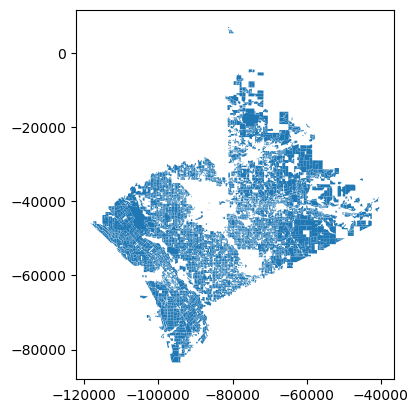

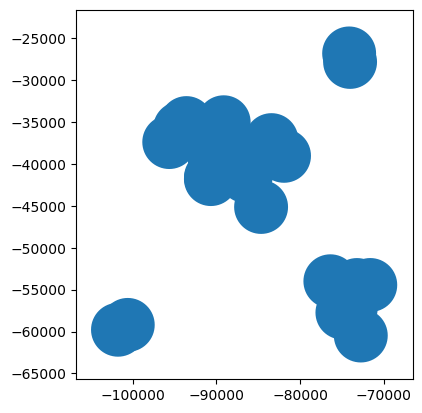

In [112]:
# https://automating-gis-processes.github.io/CSC/notebooks/L2/geopandas-basics.html
%matplotlib inline
fbs.plot()
dfstan_pr_wbuffer.plot()

In [14]:
fbs['area'] = fbs.area

In [5]:
fp_doed = r"C:\Users\nariv\OneDrive\JupyterN\streamlit_local\pesticides\data_sources\CA_Dept_Education"

dfstan_pr = gpd.read_file(fp_doed + r"\California_Private_Schools_Stanislaus.geojson")
dfstan_pu = gpd.read_file(fp_doed + r"\California_Public_Schools_Stanislaus.geojson")

In [6]:
dfstan_pr.sindex.valid_query_predicates

{None,
 'contains',
 'contains_properly',
 'covered_by',
 'covers',
 'crosses',
 'dwithin',
 'intersects',
 'overlaps',
 'touches',
 'within'}

In [7]:
dfstan_pu.sindex.valid_query_predicates

{None,
 'contains',
 'contains_properly',
 'covered_by',
 'covers',
 'crosses',
 'dwithin',
 'intersects',
 'overlaps',
 'touches',
 'within'}

In [9]:
fn ='https://github.com/narvhal/pesticides/blob/41d951c1cfa26f058ac7d95b7b79e6cc0449f72c/data_sources/AgComm_Stanislaus/field_boundaries/Crops_02_12_2024.shp'


fbs2 = gpd.read_file(fn, driver = "")

DataSourceError: '/vsicurl/https://github.com/narvhal/pesticides/blob/41d951c1cfa26f058ac7d95b7b79e6cc0449f72c/data_sources/AgComm_Stanislaus/field_boundaries/Crops_02_12_2024.shp' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [20]:


fn =r"https://github.com/narvhal/pesticides/blob/6db51365c915330f56b0bb7f40348a88e28d3521/data_sources/AgComm_Stanislaus/field_boundaries/Crops_02_12_2024.shp"
# fn =r"https://raw.githubusercontent.com/narvhal/pesticides/data_sources/AgComm_Stanislaus/field_boundaries/Crops_02_12_2024.shp"
# fn = r"https://github.com/narvhal/pesticides/blob/6db51365c915330f56b0bb7f40348a88e28d3521/data_sources/AgComm_Stanislaus/Crops_02_12_2024.zip"
response = requets.get(fn)

# with zipfile.ZipFile(io.BytesIO(response.content)) as z:
#     z.extractall("shapefile_directory")

# Step 3: Read the shapefile using geopandas
# shapefile_path = "shapefile_directory/Crops_02_12_2024.shp"
gdf = gpd.read_file(fn)



DataSourceError: '/vsicurl/https://github.com/narvhal/pesticides/blob/6db51365c915330f56b0bb7f40348a88e28d3521/data_sources/AgComm_Stanislaus/field_boundaries/Crops_02_12_2024.shp' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [11]:
#### NEED TO RIGHT CLICK ON RAW AND COPY URL TO GET REAL URL LINK FROM GH
fn = "https://github.com/narvhal/pesticides/raw/main/data_sources/AgComm_Stanislaus/field_boundaries/Crops_02_12_2024.shp"

with fiona.open(fn, mode = "r", driver = "ESRI Shapefile") as shp:
    # ax = geo.plot()
    gdf = shp

In [7]:
fn = r"https://github.com/narvhal/pesticides/blob/6db51365c915330f56b0bb7f40348a88e28d3521/data_sources/AgComm_Stanislaus/Crops_02_12_2024.zip"
response = requests.get(fn)

# Step 2: Unzip the downloaded file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("shapefile_directory")

# Step 3: Read the shapefile using geopandas
shapefile_path = "shapefile_directory/Crops_02_12_2024.shp"
gdf = gpd.read_file(shapefile_path)

BadZipFile: File is not a zip file

In [14]:
ssc = st.empty()

2024-08-27 17:15:26.564 
  command:

    streamlit run C:\Users\nariv\anaconda3\envs\py3streamlit\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [17]:
if ssc: print('hi')
    

hi
